<a href="https://colab.research.google.com/github/cameronmblake-max/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset_path = '/content/drive/MyDrive/uni/DS3000/student_performance.csv'

dataset = pd.read_csv(dataset_path)
dataset.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [ ]:
# Map the letter grade to a numeric value
grade_mapping = {
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1,
    'F': 0
}
dataset['grade_numeric'] = dataset['grade'].map(grade_mapping)
dataset.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade,grade_numeric
0,1,18.5,95.6,3.8,97.9,A,4
1,2,14.0,80.0,2.5,83.9,B,3
2,3,19.5,86.3,5.3,100.0,A,4
3,4,25.7,70.2,7.0,100.0,A,4
4,5,13.4,81.9,6.9,92.0,A,4


In [ ]:
dataset.describe()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade_numeric
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845,3.298056
std,288675.278933,6.899431,9.424143,1.956421,15.432969,0.915213
min,1.000000,0.000000,50.000000,0.000000,9.400000,0.000000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000,3.000000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000,4.000000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000,4.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000,4.000000


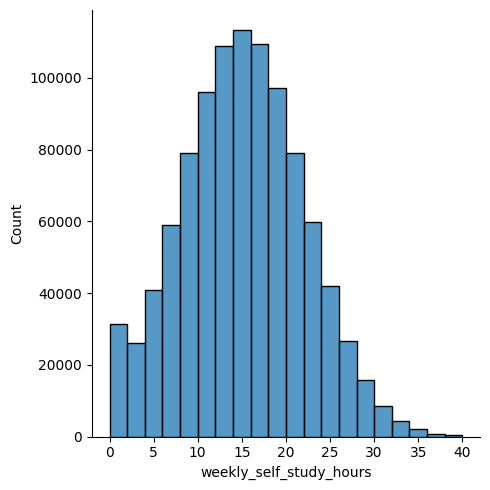

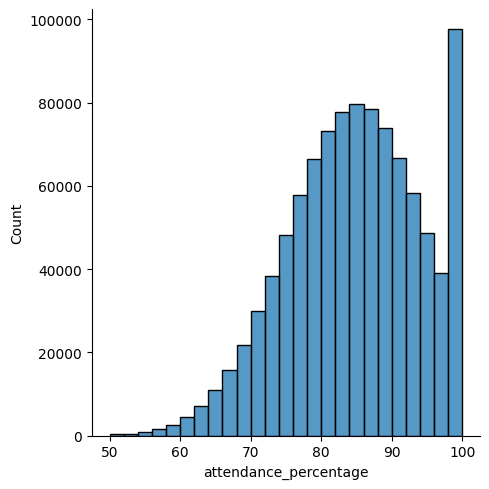

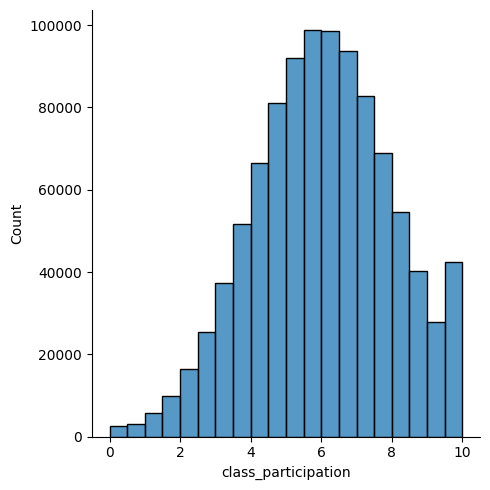

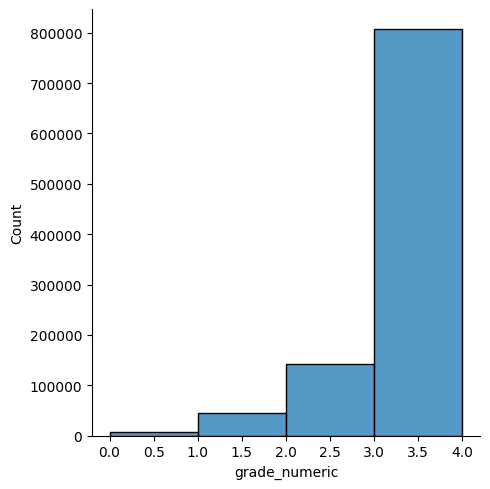

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Displots for each colunm we want to analyze
sns.displot(dataset['weekly_self_study_hours'], binwidth=2, )
sns.displot(dataset['attendance_percentage'], binwidth=2, )
sns.displot(dataset['class_participation'], binwidth=0.5, )
sns.displot(dataset['grade_numeric'], binwidth=1, )

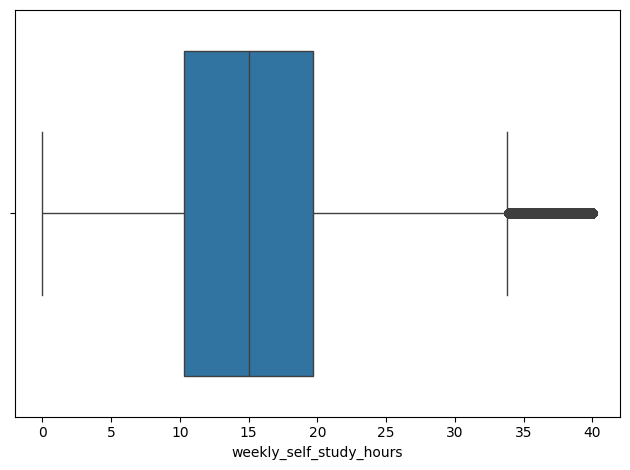

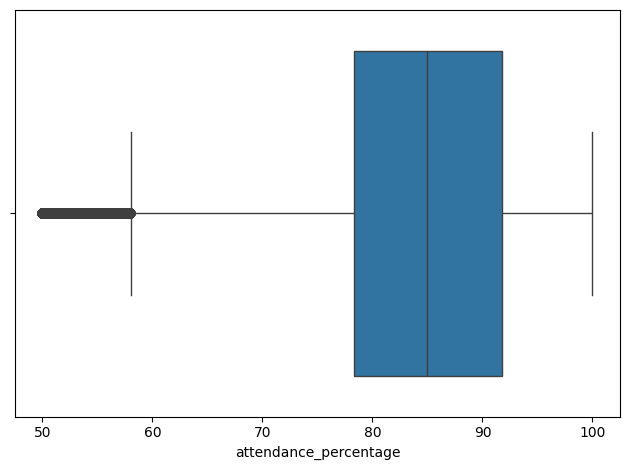

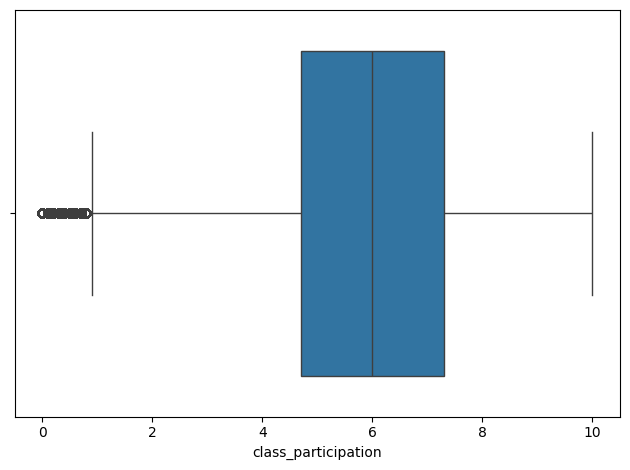

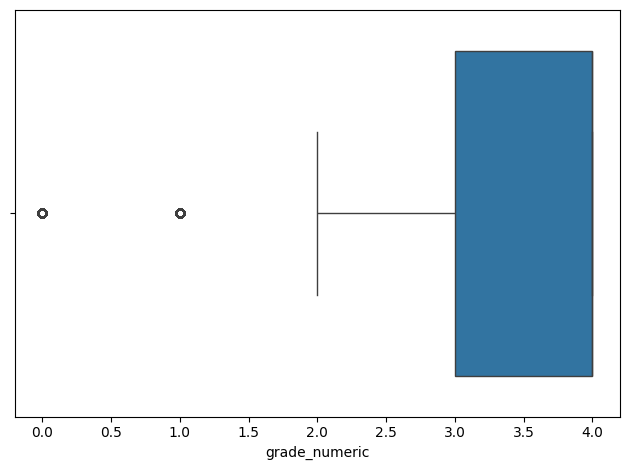

In [ ]:
# Boxplots for each colunm
cols = ['weekly_self_study_hours', 'attendance_percentage', 'class_participation', 'grade_numeric']
for col in cols:
    sns.boxplot(x=dataset[col])
    plt.tight_layout()
    plt.show()

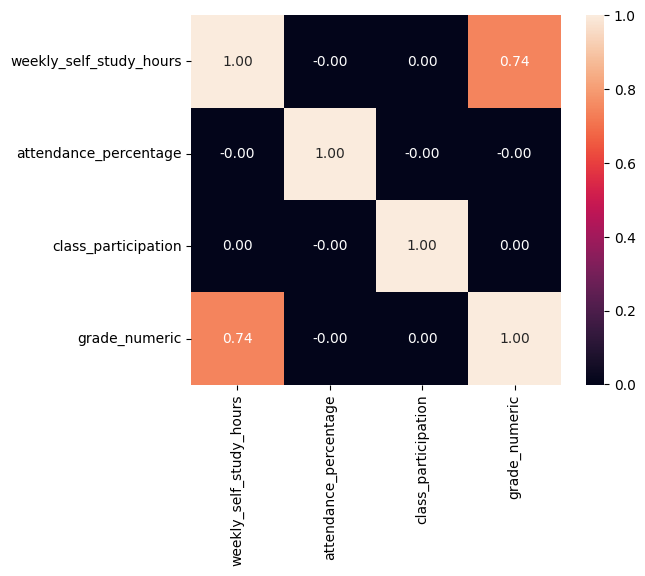

In [ ]:
# Analyzing corelated values
import numpy as np
cm = np.corrcoef(dataset[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True, #display color bar
                 annot=True, #annotate each cell with correlation value
                 square=True, #make the heatmap square
                 fmt='.2f', #format to 2 decimal places
                 annot_kws={'size': 10}, #sets annotation size
                 yticklabels=cols, #y axis labels
                 xticklabels=cols) #x axis labels

# Simple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset[['weekly_self_study_hours']]
y = dataset[['grade_numeric']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

slr = LinearRegression()
slr.fit(X_train_scaled, y_train)

y_pred = slr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2: {r2:.4f}")
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"RMSE: {rmse:.4f}")


R^2: 0.5535
RMSE: 0.6111


The SLR analysis resulted in an r2 score of 0.5535. This is a promising score; however, it only takes into account one feature of the data (study hours). Further, the grade data is descrete, which raises concerns about the validity of a regression model. Instead, we will use classificaton to analzye the data.

# Classification
Since we have discorvered that this data is best analized using classification, we will be creating and comparing 4 models using 4 methods:
1. (Ordinal) Logistic Regression
2. Random Forest
3. XGBoost
4. K-Nearest Neighbors

## Logistic Regression

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Classifier trained successfully.

Logistic Regression MAE: 0.3228
Logistic Regression MSE: 0.3629
Logistic Regression R^2: 0.5661
Logistic Regression Accuracy: 0.6970


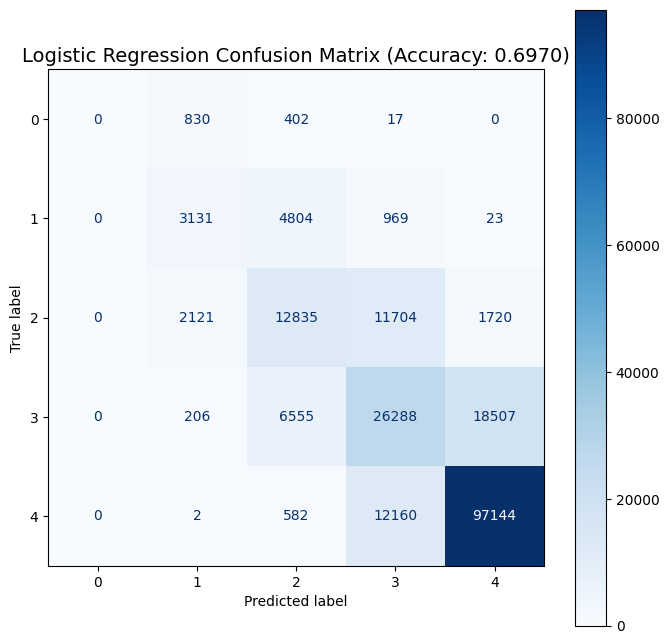

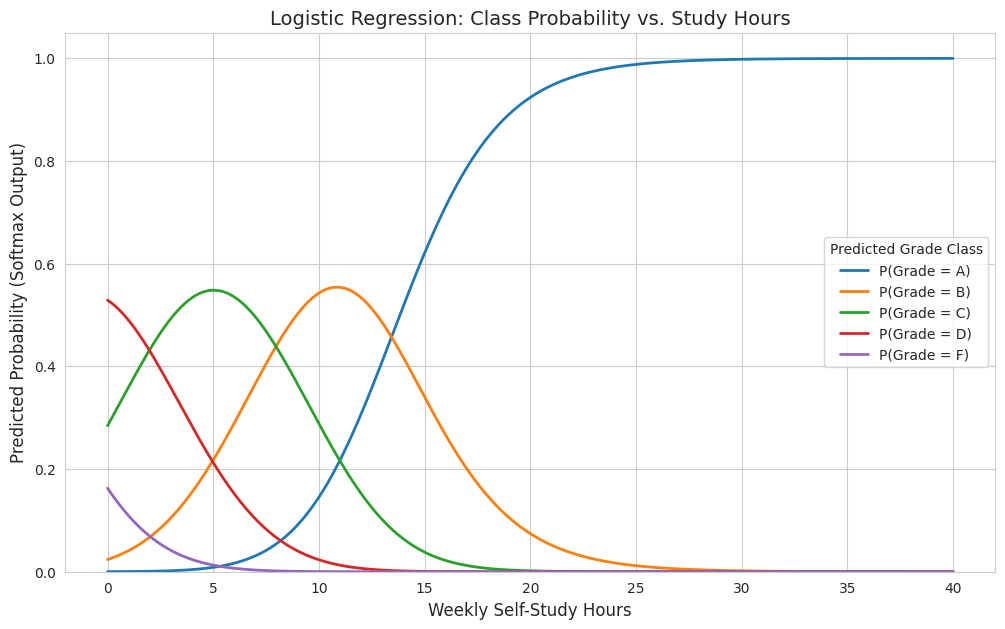

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import re
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Re-load dataset and map grades if not already defined (to prevent NameError if kernel resets)
dataset_path = '/content/drive/MyDrive/uni/DS3000/student_performance.csv'
dataset = pd.read_csv(dataset_path)
grade_mapping = {
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1,
    'F': 0
}
dataset['grade_numeric'] = dataset['grade'].map(grade_mapping)

# 1. Define the features (X) and target (y)
X = dataset[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]
y = dataset['grade_numeric']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and fit a StandardScaler
scaler_logreg = StandardScaler()
X_train_scaled_logreg = scaler_logreg.fit_transform(X_train)
X_test_scaled_logreg = scaler_logreg.transform(X_test)

# 4. Instantiate and train a Logistic Regression Classifier
# Using 'multinomial' for multiclass classification and 'lbfgs' solver
logreg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
logreg_classifier.fit(X_train_scaled_logreg, y_train)

print("Logistic Regression Classifier trained successfully.")

# 5. Make predictions on the test data
y_pred_logreg = logreg_classifier.predict(X_test_scaled_logreg)

# 6. Evaluate the model
mae_logreg = mean_absolute_error(y_test, y_pred_logreg)
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
r2_logreg = r2_score(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

print(f"\nLogistic Regression MAE: {mae_logreg:.4f}")
print(f"Logistic Regression MSE: {mse_logreg:.4f}")
print(f"Logistic Regression R^2: {r2_logreg:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

# 7. Visualizations

# Re-define grade_map for consistent plotting labels
grade_map = {
    4: 'A',
    3: 'B',
    2: 'C',
    1: 'D',
    0: 'F'
}

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg_classifier.classes_)

fig, ax = plt.subplots(figsize=(8, 8))
disp_logreg.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title(f'Logistic Regression Confusion Matrix (Accuracy: {accuracy_logreg:.4f})', fontsize=14)
plt.show()

# Class Probability vs. Study Hours
x_min = X['weekly_self_study_hours'].min()
x_max = X['weekly_self_study_hours'].max()
study_hours_range = np.linspace(x_min, x_max, 500)
x_range_logreg = pd.DataFrame({
    'weekly_self_study_hours': study_hours_range,
    'attendance_percentage': X_train['attendance_percentage'].mean(),
    'class_participation': X_train['class_participation'].mean()
})

# Scale the x_range_logreg for prediction
x_range_logreg_scaled = scaler_logreg.transform(x_range_logreg)

y_prob_logreg = logreg_classifier.predict_proba(x_range_logreg_scaled)
grade_classes_logreg = logreg_classifier.classes_

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

for i in reversed(range(len(grade_classes_logreg))):
    plt.plot(
        x_range_logreg['weekly_self_study_hours'],
        y_prob_logreg[:, i],
        label=f'P(Grade = {grade_map[grade_classes_logreg[i]]})',
        linewidth=2
    )

plt.title('Logistic Regression: Class Probability vs. Study Hours', fontsize=14)
plt.xlabel('Weekly Self-Study Hours', fontsize=12)
plt.ylabel('Predicted Probability (Softmax Output)', fontsize=12)
plt.legend(title='Predicted Grade Class', loc='center right')
plt.ylim(0, 1.05)
plt.show()

## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define the features (X)
X = dataset[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]

# 2. Define the target (y)
y = dataset['grade_numeric']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize a StandardScaler
scaler = StandardScaler()

# 5. Fit the scaler to the training features and transform both training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preparation for Random Forest complete. X_train_scaled and X_test_scaled are ready.")

Data preparation for Random Forest complete. X_train_scaled and X_test_scaled are ready.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier object
rf_classifier = RandomForestClassifier(random_state=42)

# Train the RandomForestClassifier on the scaled training features and the training target
rf_classifier.fit(X_train_scaled, y_train)

print("RandomForestClassifier trained successfully.")

RandomForestClassifier trained successfully.


In [ ]:
y_pred_rf = rf_classifier.predict(X_test_scaled)

print("Predictions made on the test data.")

Predictions made on the test data.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Calculate Mean Absolute Error (MAE)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.4f}")

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {mse_rf:.4f}")

# Calculate R-squared (R^2)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R^2: {r2_rf:.4f}")

# Calculate Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest MAE: 0.4010
Random Forest MSE: 0.4958
Random Forest R^2: 0.4072
Random Forest Accuracy: 0.6447


### Random Forest Visualizations

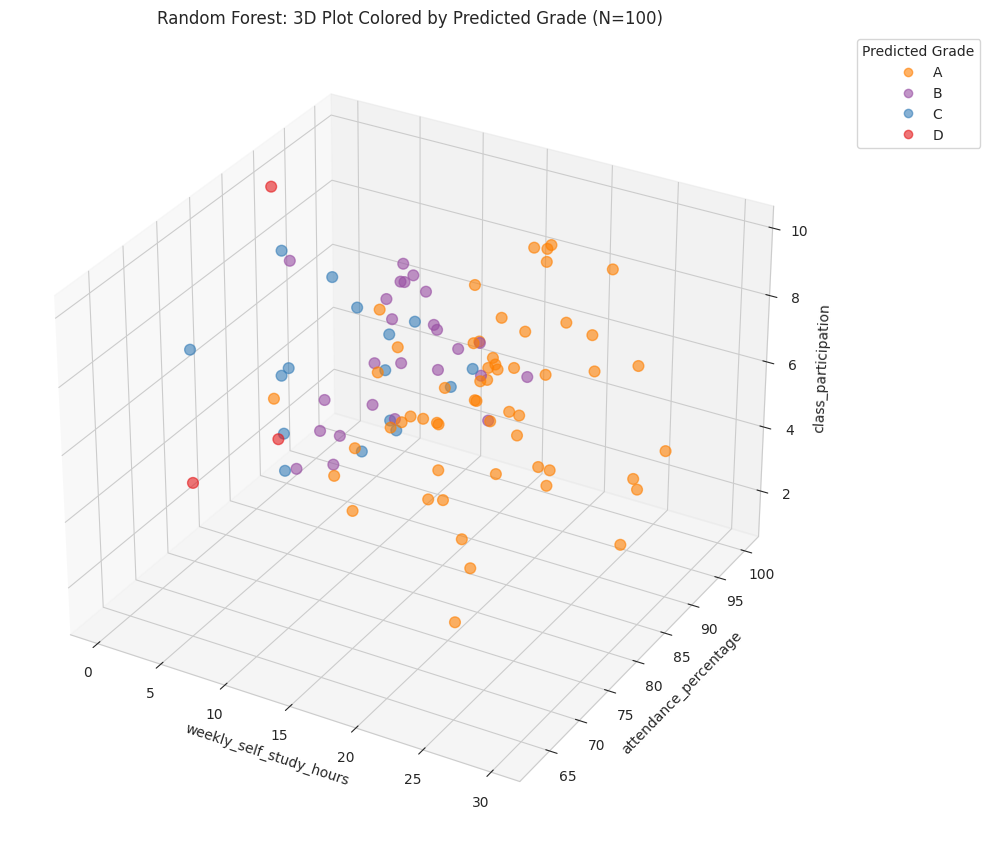

In [ ]:
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Re-define grade_map and ordered_grades if not already globally defined in the session
grade_map = {
    4: 'A',
    3: 'B',
    2: 'C',
    1: 'D',
    0: 'F'
}
ordered_grades = ['A', 'B', 'C', 'D', 'F']

# Sample X_test (unscaled) for plotting axes
X_test_sample_rf = X_test.sample(n=100, random_state=42) # Ensure consistency with XGBoost if desired

# Scale this sample using the already fitted scaler
X_test_sample_rf_scaled = scaler.transform(X_test_sample_rf)

# Predict on the scaled sample using the Random Forest classifier
predictions_rf = rf_classifier.predict(X_test_sample_rf_scaled)

x_rf = X_test_sample_rf['weekly_self_study_hours']
y_rf = X_test_sample_rf['attendance_percentage']
z_rf = X_test_sample_rf['class_participation']

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False) # Use auto_add_to_figure=False to manually add axes for older matplotlib versions
fig.add_axes(ax)

num_classes = 5
cmap = ListedColormap(sns.color_palette("Set1", num_classes).as_hex())

sc = ax.scatter(x_rf, y_rf, z_rf, s=60, c=predictions_rf, marker='o', cmap=cmap, alpha=0.6)

ax.set_xlabel('weekly_self_study_hours')
ax.set_ylabel('attendance_percentage')
ax.set_zlabel('class_participation')

handles, labels = sc.legend_elements()

# Fix the regex: use r'\D+' to remove all non-digit characters
numerical_classes = [int(re.sub(r'\D+', '', label)) for label in labels]

legend_data = []
for num_class, handle in zip(numerical_classes, handles):
    grade = grade_map.get(num_class, f'Unknown Class {num_class}')
    legend_data.append((num_class, handle, grade))

sorted_legend_data = sorted(legend_data, key=lambda x: x[0], reverse=True)

sorted_handles = [item[1] for item in sorted_legend_data]
sorted_grades = [item[2] for item in sorted_legend_data]

plt.legend(sorted_handles, sorted_grades, bbox_to_anchor=(1.05, 1), loc=2, title="Predicted Grade")
plt.title(f"Random Forest: 3D Plot Colored by Predicted Grade (N={len(x_rf)})")
plt.show()

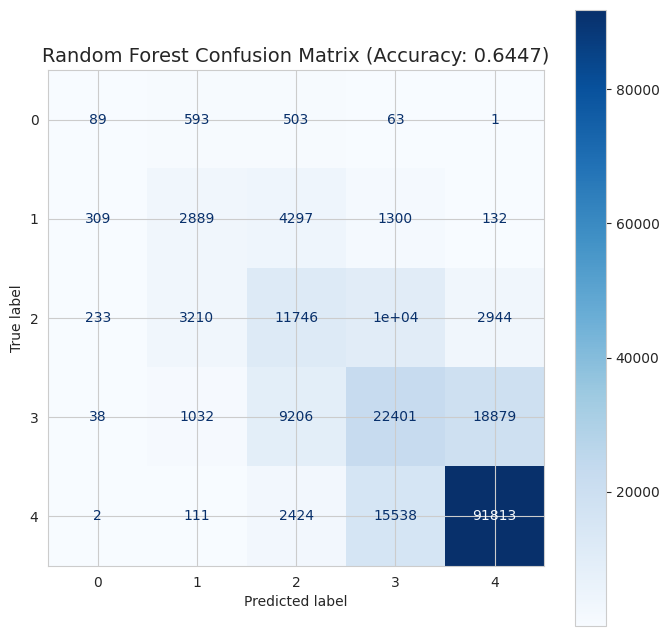

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_classifier.classes_)

# Plot the matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp_rf.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title(f'Random Forest Confusion Matrix (Accuracy: {accuracy_rf:.4f})', fontsize=14)
plt.show()

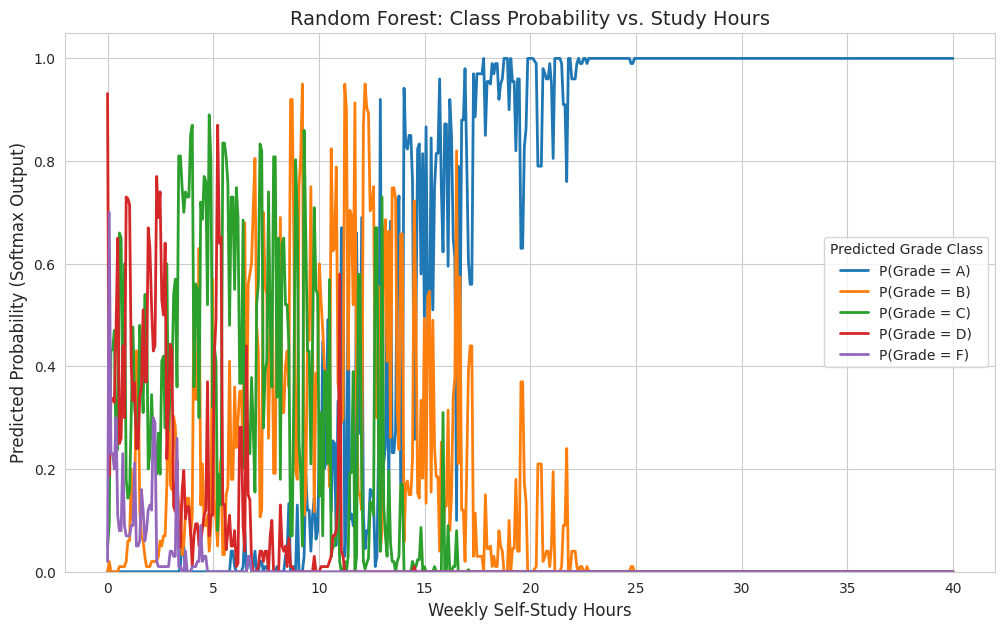

In [ ]:
x_min = X['weekly_self_study_hours'].min()
x_max = X['weekly_self_study_hours'].max()
study_hours_range = np.linspace(x_min, x_max, 500)
x_range_rf = pd.DataFrame({
    'weekly_self_study_hours': study_hours_range,
    'attendance_percentage': X_train['attendance_percentage'].mean(), # Using mean from original X_train
    'class_participation': X_train['class_participation'].mean() # Using mean from original X_train
})

# Scale the x_range_rf using the previously fitted scaler
x_range_rf_scaled = scaler.transform(x_range_rf)

y_prob_rf = rf_classifier.predict_proba(x_range_rf_scaled)
grade_classes_rf = rf_classifier.classes_

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Plot the probability line for each class (Grade 0 through 4)
for i in reversed(range(len(grade_classes_rf))):
    plt.plot(
        x_range_rf['weekly_self_study_hours'],
        y_prob_rf[:, i],
        label=f'P(Grade = {grade_map[grade_classes_rf[i]]})',
        linewidth=2
    )

plt.title('Random Forest: Class Probability vs. Study Hours', fontsize=14)
plt.xlabel('Weekly Self-Study Hours', fontsize=12)
plt.ylabel('Predicted Probability (Softmax Output)', fontsize=12)
plt.legend(title='Predicted Grade Class', loc='center right')
plt.ylim(0, 1.05)
plt.show()

## XGBoost

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Define the features (X)
X = dataset[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]

# 2. Define the target (y)
y = dataset['grade_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random state=42)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-362444324.py, line 9)

In [ ]:
import xgboost as xgb

clf  = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4
)

clf.fit(X_train, y_train)

y_pred_xgb = clf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Calculate Mean Absolute Error (MAE)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb:.4f}")

# Calculate Mean Squared Error (MSE)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb:.4f}")

# Calculate R-squared (R^2)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost R^2: {r2_xgb:.4f}")

# Calculate Accuracy Score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

In [ ]:
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


grade_map = {
    4: 'A',
    3: 'B',
    2: 'C',
    1: 'D',
    0: 'F'
}
ordered_grades = ['A', 'B', 'C', 'D', 'F']
X_test_sample = X_test.sample(n=100)
predictions = clf.predict(X_test_sample)

x = X_test_sample['weekly_self_study_hours']
y = X_test_sample['attendance_percentage']
z = X_test_sample['class_participation']


fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)


num_classes = 5
cmap = ListedColormap(sns.color_palette("Set1", num_classes).as_hex())


sc = ax.scatter(x, y, z, s=60, c=predictions, marker='o', cmap=cmap, alpha=0.6)

ax.set_xlabel('weekly_self_study_hours')
ax.set_ylabel('attendance_percentage')
ax.set_zlabel('class_participation')
handles, labels = sc.legend_elements()

numerical_classes = [int(re.sub(r'[^\d]+', '', label)) for label in labels]

legend_data = []
for num_class, handle in zip(numerical_classes, handles):
    grade = grade_map.get(num_class, f'Unknown Class {num_class}')
    legend_data.append((num_class, handle, grade))

sorted_legend_data = sorted(legend_data, key=lambda x: x[0], reverse=True)

sorted_handles = [item[1] for item in sorted_legend_data]
sorted_grades = [item[2] for item in sorted_legend_data]

plt.legend(sorted_handles, sorted_grades, bbox_to_anchor=(1.05, 1), loc=2, title="Predicted Grade")
plt.title(f"3D Plot Colored by Predicted Grade (N={len(x)})")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Plot the matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title(f'Confusion Matrix (Accuracy: {accuracy_xgb:.4f})', fontsize=14)
plt.show()

In [ ]:
x_min = X['weekly_self_study_hours'].min()
x_max = X['weekly_self_study_hours'].max()
study_hours_range = np.linspace(x_min, x_max, 500)
x_range = pd.DataFrame({
    'weekly_self_study_hours': study_hours_range,
    'attendance_percentage': X_train['attendance_percentage'].mean(),
    'class_participation': X_train['class_participation'].mean()
})

y_prob = clf.predict_proba(x_range)
grade_classes = clf.classes_

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# Plot the probability line for each class (Grade 0 through 4)
for i in reversed(range(len(grade_classes))):
    plt.plot(
        x_range['weekly_self_study_hours'],
        y_prob[:, i],
        label=f'P(Grade = {grade_map[grade_classes[i]]})',
        linewidth=2
    )

plt.title('Plot 3: XGBoost Class Probability vs. Study Hours', fontsize=14)
plt.xlabel('Weekly Self-Study Hours', fontsize=12)
plt.ylabel('Predicted Probability (Softmax Output)', fontsize=12)
plt.legend(title='Predicted Grade Class', loc='center right')
plt.ylim(0, 1.05)
plt.show()

In [ ]:
from xgboost import plot_importance

plot_importance(clf, importance_type='weight', max_num_features=10)
plt.show()


## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define the features (X) - using the same features as Random Forest/XGBoost
X = dataset[['weekly_self_study_hours', 'attendance_percentage', 'class_participation']]

# 2. Define the target (y)
y = dataset['grade_numeric']

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize a StandardScaler
scaler_knn = StandardScaler()

# 5. Fit the scaler to the training features and transform both training and testing features
X_train_scaled_knn = scaler_knn.fit_transform(X_train)
X_test_scaled_knn = scaler_knn.transform(X_test)

print("Data preparation for K-Nearest Neighbors complete. X_train_scaled_knn and X_test_scaled_knn are ready.")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate a KNeighborsClassifier object
# You might want to experiment with `n_neighbors` (e.g., 5, 7, 9)
knn_classifier = KNeighborsClassifier(n_neighbors=20)

# Train the KNeighborsClassifier on the scaled training features and the training target
knn_classifier.fit(X_train_scaled_knn, y_train)

print("KNeighborsClassifier trained successfully.")

In [ ]:
y_pred_knn = knn_classifier.predict(X_test_scaled_knn)

print("Predictions made on the test data.")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"K-Nearest Neighbors MAE: {mae_knn:.4f}")

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"K-Nearest Neighbors MSE: {mse_knn:.4f}")

# Calculate R-squared (R^2)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors R^2: {r2_knn:.4f}")

# Calculate Accuracy Score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")

### K-Nearest Neighbors Visualizations

In [ ]:
import re, seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Re-define grade_map and ordered_grades if not already globally defined in the session
grade_map = {
    4: 'A',
    3: 'B',
    2: 'C',
    1: 'D',
    0: 'F'
}
ordered_grades = ['A', 'B', 'C', 'D', 'F']

# Sample X_test (unscaled) for plotting axes
X_test_sample_knn = X_test.sample(n=100, random_state=42) # Ensure consistency

# Scale this sample using the already fitted scaler
X_test_sample_knn_scaled = scaler_knn.transform(X_test_sample_knn)

# Predict on the scaled sample using the KNN classifier
predictions_knn = knn_classifier.predict(X_test_sample_knn_scaled)

x_knn = X_test_sample_knn['weekly_self_study_hours']
y_knn = X_test_sample_knn['attendance_percentage']
z_knn = X_test_sample_knn['class_participation']

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

num_classes = 5
cmap = ListedColormap(sns.color_palette("Set1", num_classes).as_hex())

sc = ax.scatter(x_knn, y_knn, z_knn, s=60, c=predictions_knn, marker='o', cmap=cmap, alpha=0.6)

ax.set_xlabel('weekly_self_study_hours')
ax.set_ylabel('attendance_percentage')
ax.set_zlabel('class_participation')

handles, labels = sc.legend_elements()

# Fix the regex: use r'\D+' to remove all non-digit characters
numerical_classes = [int(re.sub(r'\D+', '', label)) for label in labels]

legend_data = []
for num_class, handle in zip(numerical_classes, handles):
    grade = grade_map.get(num_class, f'Unknown Class {num_class}')
    legend_data.append((num_class, handle, grade))

sorted_legend_data = sorted(legend_data, key=lambda x: x[0], reverse=True)

sorted_handles = [item[1] for item in sorted_legend_data]
sorted_grades = [item[2] for item in sorted_legend_data]

plt.legend(sorted_handles, sorted_grades, bbox_to_anchor=(1.05, 1), loc=2, title="Predicted Grade")
plt.title(f"K-Nearest Neighbors: 3D Plot Colored by Predicted Grade (N={len(x_knn)})")
plt.show()

NameError: name 'scaler_knn' is not defined

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn_classifier.classes_)

# Plot the matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp_knn.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title(f'K-Nearest Neighbors Confusion Matrix (Accuracy: {accuracy_knn:.4f})', fontsize=14)
plt.show()